In [1]:
import os
import numpy as np
import cv2
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import keras_ocr
import re
import math

In [ ]:
"""
1. Convert PDF into a folder of images of same name
2. For each image, divide them into respective questions
3. Remove empty text images
4. Put remaining images in respective folders
5. For each image in each folder detect checkboxes and put them in a new sub folder
"""

In [ ]:
#os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1')

In [ ]:
"""
images = convert_from_path('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1.pdf')
 
for i in range(len(images)):
      # Save pages as images in the pdf
    images[i].save('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page'+ str(i) +'.jpg', 'JPEG')
"""

In [ ]:
# Sample1.pdf 

In [2]:
def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = cv2.imread(filename)
    plt.figure()
    plt.imshow(image)
    plt.title(filename)

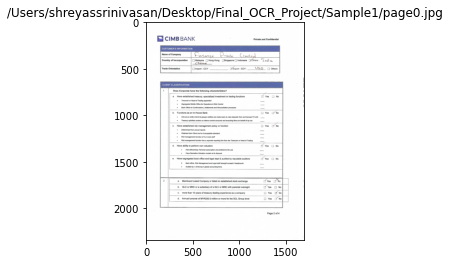

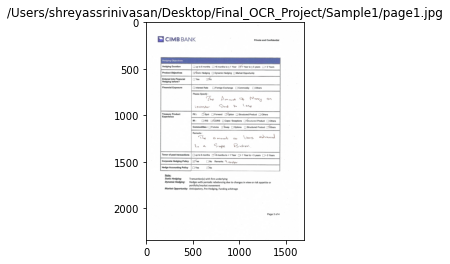

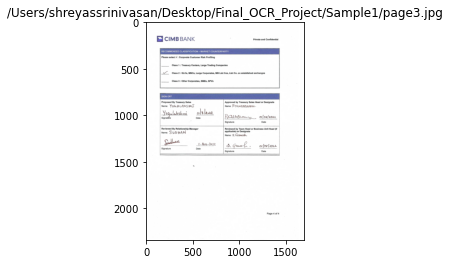

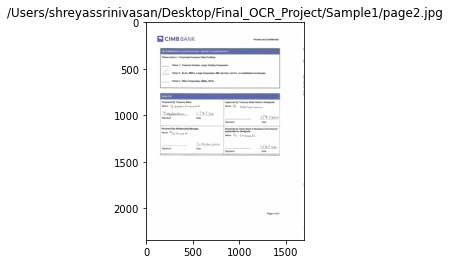

In [3]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1'
images = []
for i in os.listdir(path):
    if('.jpg' in i):
        #Image.fromarray(i).show()
        images.append(path+'/'+i)
for file in images:
    process(file)       

In [ ]:
"""
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1'

for i in os.listdir(path):
    X = i.replace('.jpg','')
    os.makedirs(path + '/' + str(X))
"""

In [4]:
"""
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1'
for i in os.listdir(path):
    if('.jpg' in i):
        X = i.replace('.jpg','')
        image = cv2.imread(path + '/' + i)
        original = image.copy()
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5,5), 0)
        thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
        dilate = cv2.dilate(thresh, kernel, iterations=2)

        # Find contours, obtain bounding box coordinates, and extract ROI
        cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        image_number = 0
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
            ROI = original[y:y+h, x:x+w]
            #Image.fromarray(image).show()
            cv2.imwrite(path + '/' + X + '/ROI_{}.png'.format(image_number), ROI)
            image_number += 1
"""

/var/folders/6g/2s9w_y1x7cd2517q07kdbmnh0000gn/T/ipykernel_40803/1663829186.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


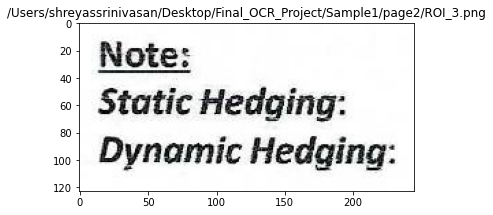

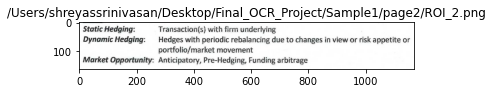

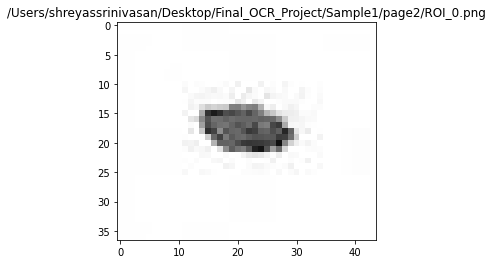

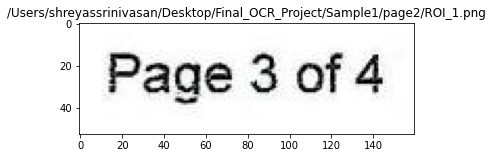

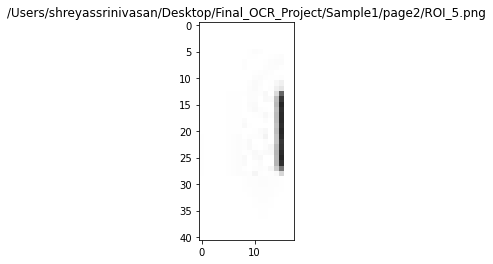

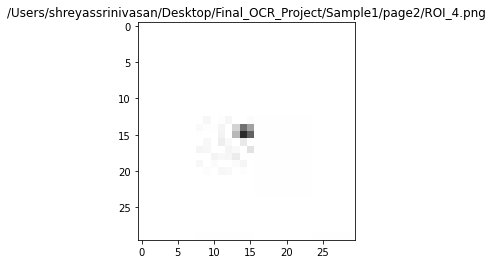

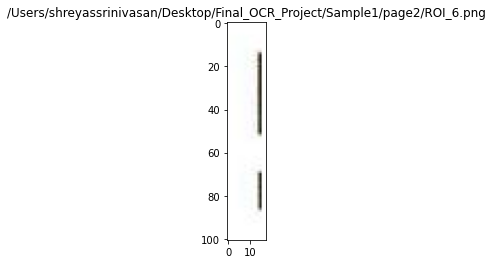

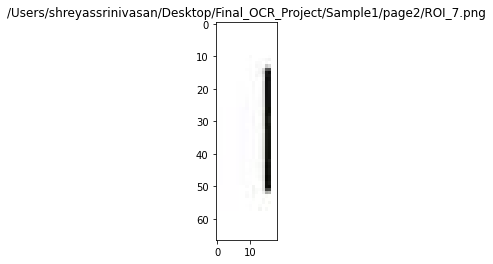

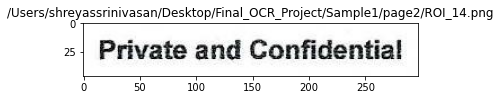

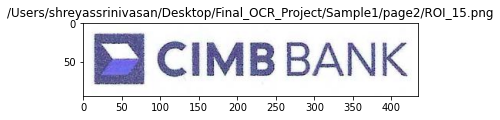

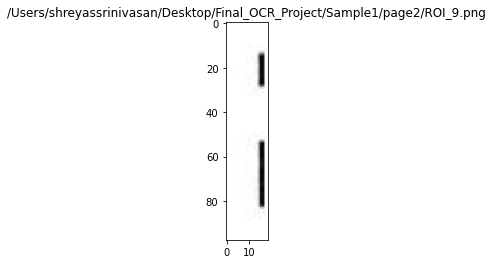

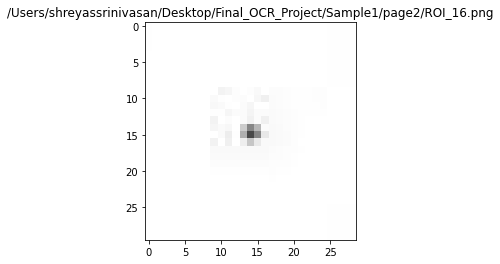

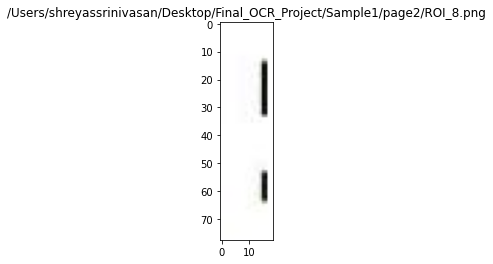

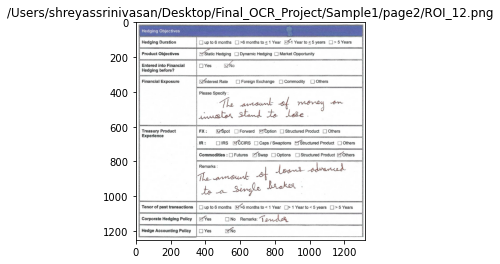

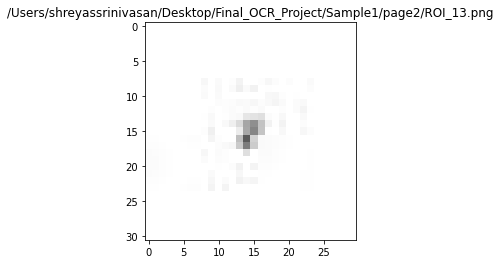

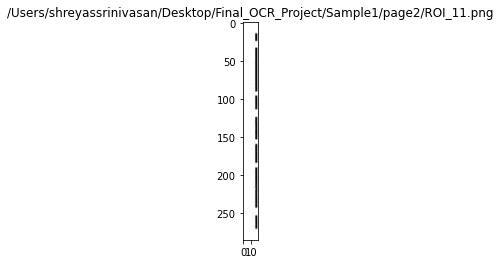

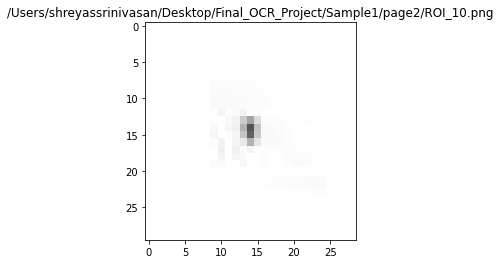

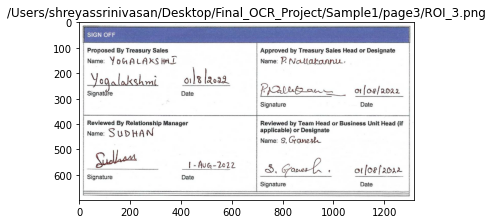

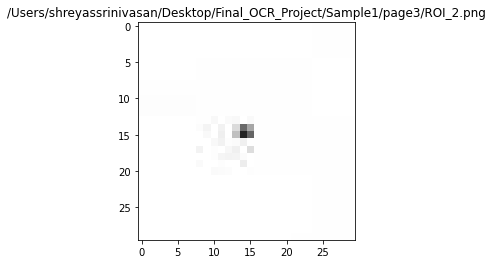

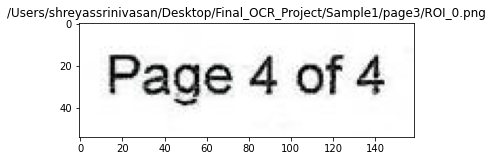

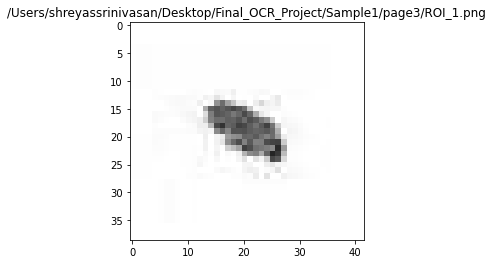

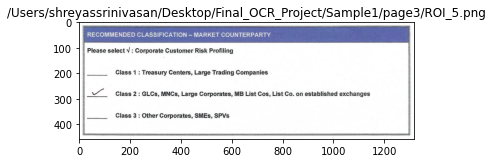

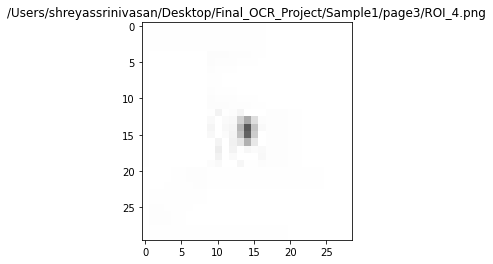

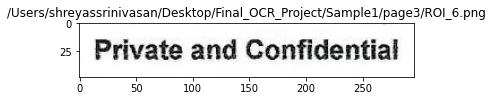

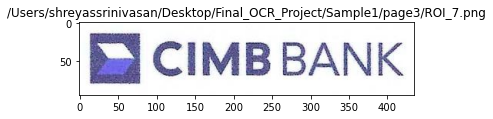

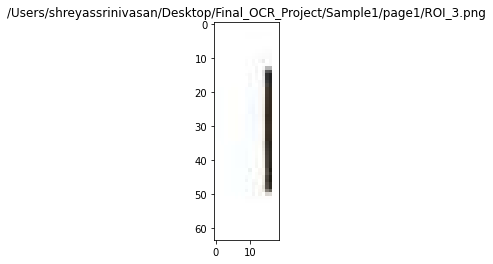

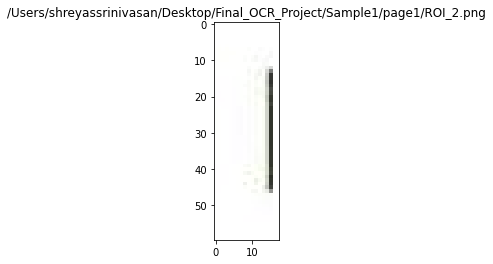

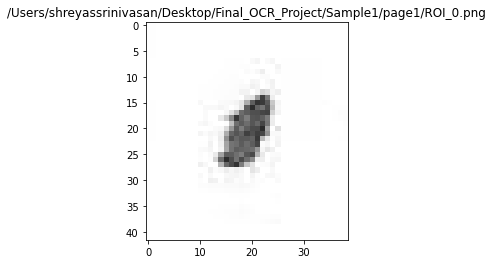

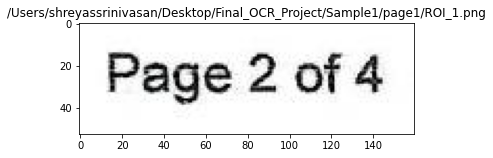

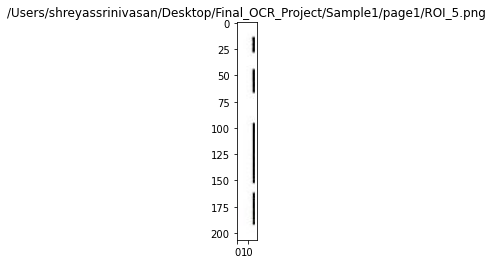

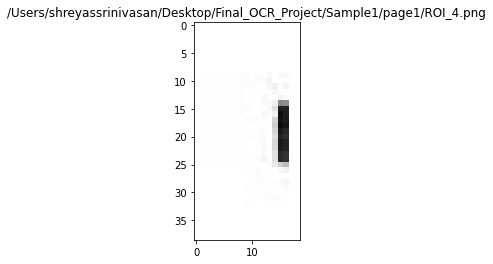

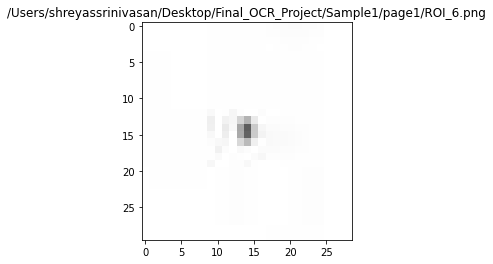

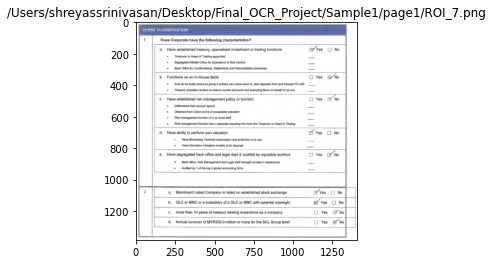

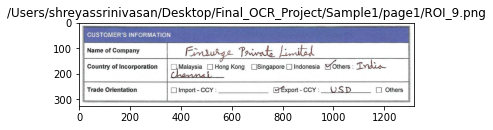

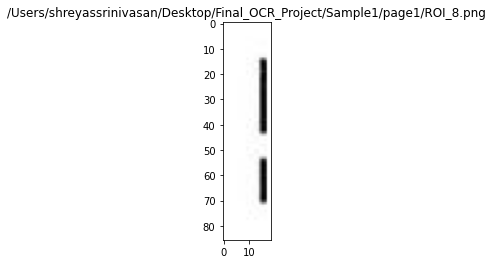

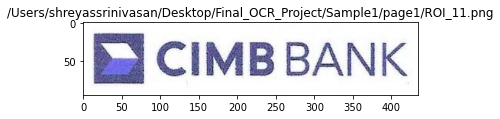

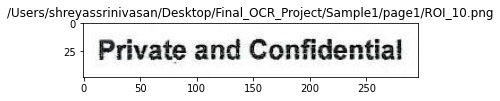

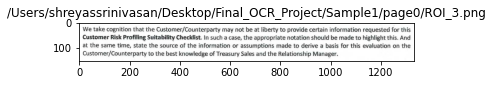

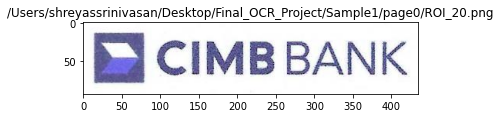

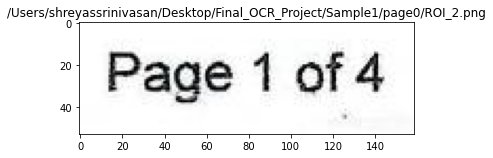

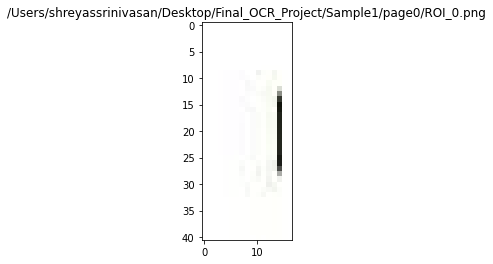

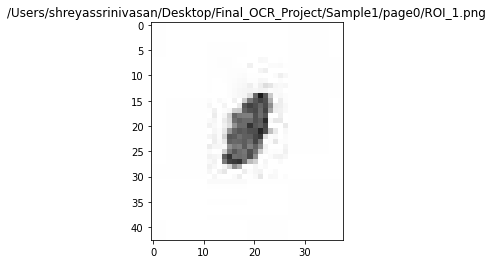

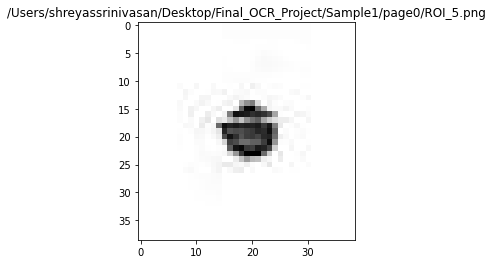

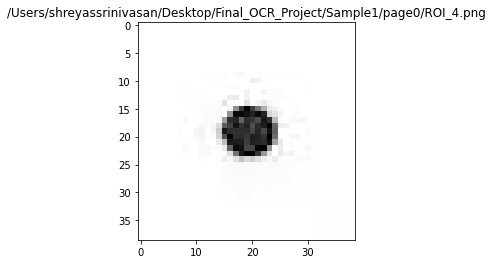

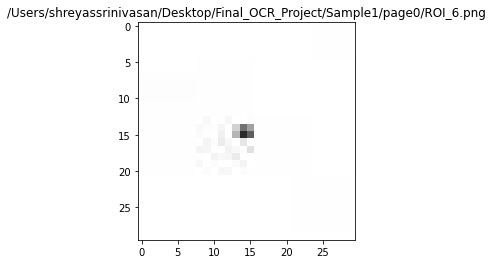

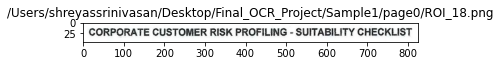

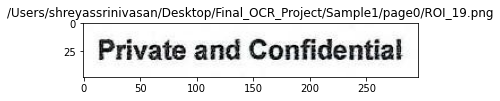

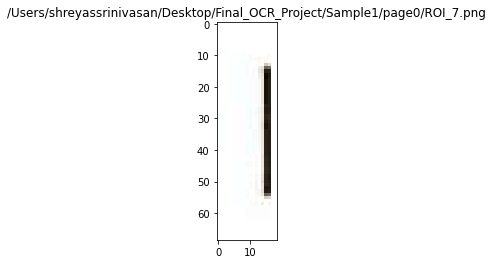

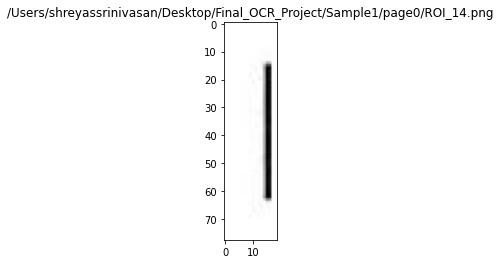

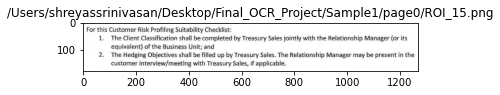

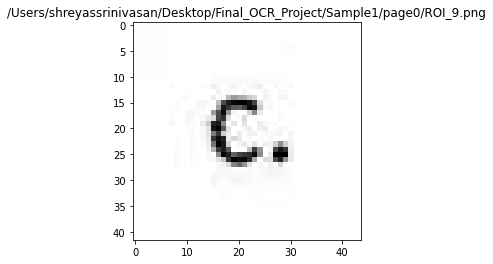

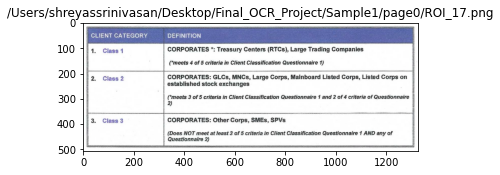

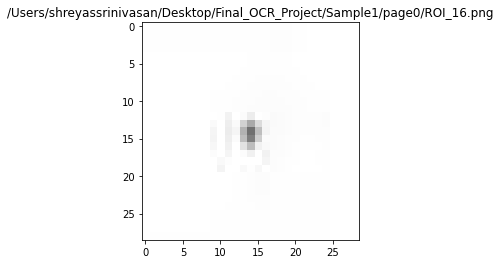

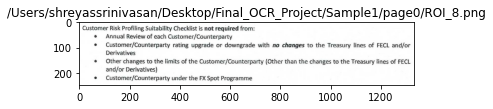

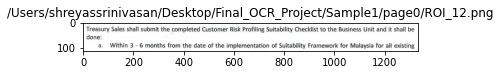

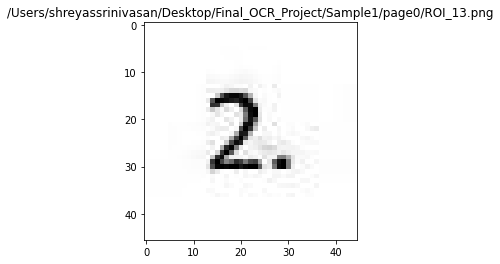

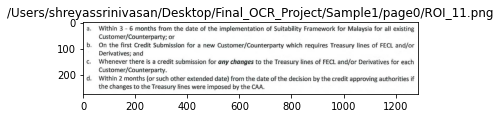

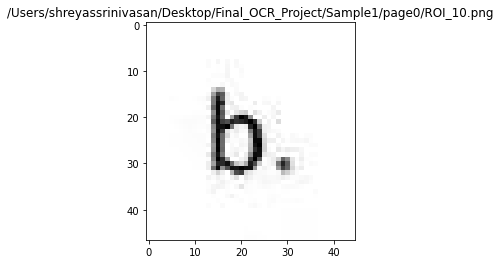

In [4]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1'
images = []
for i in os.listdir(path):
    if('.jpg' not in i and i != '.DS_Store'):
        for j in os.listdir(path + '/' + i):  
            if('.png' in j):
                images.append(path + '/' + i + '/' + j)
for file in images:
    process(file) 

In [ ]:
"""
Useful Images

Page 2:
1. ROI_12.png

Page 3
1. ROI_3.png
2. ROI_5.png

Page 1
1. ROI_7.png
2. ROI_9.png
"""

In [ ]:
"""
Page 1: ROI_7.png
"""

In [23]:
"""
os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7')
os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_9')
os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12')
os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_3')
os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_5')
"""

In [46]:
"""
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1'
for i in os.listdir(path):
    if(i == 'ROI_7.png'):
        X = i.replace('.png','')
        image = cv2.imread(path + '/' + i)
        original = image.copy()
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        dilate = cv2.dilate(thresh, kernel, iterations=2)

        # Find contours, obtain bounding box coordinates, and extract ROI
        cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        image_number = 0
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
            SROI = original[y:y+h, x:x+w]
            Image.fromarray(image).show()
            #cv2.imwrite(path + '/' + X + '/SROI_{}.png'.format(image_number), SROI)
            image_number += 1
    elif(i == 'ROI_9.png'):
        image = cv2.imread(path + '/' + i)
        text = pytesseract.image_to_string(image)
        if(text != ''):
            original = image.copy()
            gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(gray, (5,5), 0)
            thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
            dilate = cv2.dilate(thresh, kernel, iterations=2)

            # Find contours, obtain bounding box coordinates, and extract ROI
            cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = cnts[0] if len(cnts) == 2 else cnts[1]
            image_number = 0
            for c in cnts:
                x,y,w,h = cv2.boundingRect(c)
                cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
                SROI = original[y:y+h, x:x+w]
                X = i.replace('.png','')
                Image.fromarray(SROI).show()
                #cv2.imwrite(path + '/' + X + '/' + '/SROI_{}.png'.format(image_number), SROI)
                image_number += 1
    else:
        continue
"""

In [16]:
#Checkbox detection(normal way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 5

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [17]:
#Checkbox detection(Canny Edge Detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 30

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [56]:
#os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7/TF')

In [18]:
def inpaint_text(img_path, remove_list, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        if box[0] in remove_list:
            x0, y0 = box[1][0]
            x1, y1 = box[1][1] 
            x2, y2 = box[1][2]
            x3, y3 = box[1][3] 

            x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
            x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

            thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

            cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)
            img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
    return(img)

In [19]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [68]:
"""
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7'
for i in os.listdir(path):
    if('.png' in i):
        c = i.replace('.png','') + '_TF.png'
        remove_list1 = []
        pipeline = keras_ocr.pipeline.Pipeline()
        img = keras_ocr.tools.read(path + '/' + i)
        prediction_groups = pipeline.recognize([img])
        for j in prediction_groups[0]:
            remove_list1.append(j[0])
        Img = inpaint_text(path + '/' + i,remove_list1,pipeline)
        #Image.fromarray(Img).show() 
        #cv2.imwrite('/Users/shreyassrinivasan/Desktop/ocr/venv/Sample1/SROI_text_free_{p}'.format(p=c), Img)
        save_path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7/TF/{}'.format(c)
        Image.fromarray(Img).save(save_path)
        
"""

Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 793ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 1s/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 994ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 928ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrini

In [20]:
#Checkbox detection without text(Normal Way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7/TF'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 2

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [21]:
#Checkbox detection without text(Canny Edge detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7/TF'
d = {}
image_number = 0
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 30

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            #cv2.imwrite("/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7/TF/Checkboxes/{}.png".format(image_number), roi)
            image_number += 1
        Image.fromarray(image).show()

In [ ]:
"""
Page 1: ROI_9.png
"""

In [22]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1'
for i in os.listdir(path):
    if(i == 'ROI_9.png'):
        image = cv2.imread(path + '/' + i)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 12

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        #print(stats)
        image_number = 1
        for x,y,w,h,area in stats[2:]:
            if(area > 50000):
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
                SROI = image[y:y+h, x:x+w]
                Image.fromarray(SROI).show()
                X = i.replace('.png','')
                #cv2.imwrite(path + '/' + X + '/SROI_{}.png'.format(image_number), SROI)
                image_number += 1

In [23]:
#Checkbox detection(normal way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_9'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 5

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            if(area > 5 and area < 200):
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [24]:
#Checkbox detection(Canny Edge Detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_9'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 20

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        #print(stats)
        for x,y,w,h,area in stats[2:]:
            if(area > 100 and area < 200):
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [89]:
#os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_9/TF')

In [27]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_9'
for i in os.listdir(path):
    if('.png' in i):
        c = i.replace('.png','') + '_TF.png'
        remove_list1 = []
        pipeline = keras_ocr.pipeline.Pipeline()
        img = keras_ocr.tools.read(path + '/' + i)
        prediction_groups = pipeline.recognize([img])
        for j in prediction_groups[0]:
            remove_list1.append(j[0])
        Img = inpaint_text(path + '/' + i,remove_list1,pipeline)
        Image.fromarray(Img).show() 
        #cv2.imwrite('/Users/shreyassrinivasan/Desktop/ocr/venv/Sample1/SROI_text_free_{p}'.format(p=c), Img)
        save_path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_9/TF/{}'.format(c)
        Image.fromarray(Img).save(save_path)

Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5


2022-09-12 19:10:43.043176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 656ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 656ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 0s 244ms/step


In [28]:
#Checkbox detection without text(Normal Way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_9/TF'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 2

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [29]:
#Checkbox detection without text(Canny Edge detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_9/TF'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 30

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [ ]:
"""
Page 2: ROI_12.png
"""

In [16]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2'
for i in os.listdir(path):
    if(i == 'ROI_12.png'):
        image = cv2.imread(path + '/' + i)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 12

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        #print(stats)
        image_number = 0
        for x,y,w,h,area in stats[2:]:
            if(area > 100 and area < 200):
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
                SROI = image[y:y+h, x:x+w]
                Image.fromarray(image).show()
                X = i.replace('.png','')
                #cv2.imwrite(path + '/' + X + '/SROI_{}.png'.format(image_number), SROI)
                image_number += 1

NameError: name 'original' is not defined

In [13]:
#Checkbox detection(normal way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 5

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            if(area > 5 and area < 200):
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [20]:
#Checkbox detection(Canny Edge Detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 20

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        #print(stats)
        for x,y,w,h,area in stats[2:]:
            if(area > 200 and area < 500):
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [25]:
os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12/TF')

In [26]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12'
for i in os.listdir(path):
    if('.png' in i):
        c = i.replace('.png','') + '_TF.png'
        remove_list1 = []
        pipeline = keras_ocr.pipeline.Pipeline()
        img = keras_ocr.tools.read(path + '/' + i)
        prediction_groups = pipeline.recognize([img])
        for j in prediction_groups[0]:
            remove_list1.append(j[0])
        Img = inpaint_text(path + '/' + i,remove_list1,pipeline)
        #Image.fromarray(Img).show() 
        #cv2.imwrite('/Users/shreyassrinivasan/Desktop/ocr/venv/Sample1/SROI_text_free_{p}'.format(p=c), Img)
        save_path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12/TF/{}'.format(c)
        Image.fromarray(Img).save(save_path)

Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
4/4 [==============================] - 8s 2s/step


In [22]:
#Checkbox detection without text(Normal Way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12/TF'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 2

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12/TF'

In [23]:
#Checkbox detection without text(Canny Edge detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page2/ROI_12/TF'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 30

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [ ]:
"""
Page 3
1. ROI_3.png
2. ROI_5.png
"""

In [14]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3'
for i in os.listdir(path):
    if(i == 'ROI_3.png'):
        image = cv2.imread(path + '/' + i)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 12

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        print(stats)
        image_number = 0
        for x,y,w,h,area in stats[2:]:
            if(area > 100 and area < 200):
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
                SROI = original[y:y+h, x:x+w]
                Image.fromarray(image).show()
                X = i.replace('.png','')
                #cv2.imwrite(path + '/' + X + '/SROI_{}.png'.format(image_number), SROI)
                image_number += 1

[[    15     15   1289    670 117183]
 [     0      0   1318    699 785036]
 [    17     17   1284     17   2736]
 [    17     20      2     59    118]
 [  1300     35      1      2      2]
 [  1300     38      1      9      9]
 [    34     42     13     17    125]
 [    49     43      4     15     46]
 [    55     42     16     17    166]
 [    74     43     14     16    140]
 [    98     43     16     16    175]
 [   116     43     11     16     96]
 [   131     43     11     16     79]
 [  1300     52      1     28     28]
 [   153    104      7      1      7]
 [   153    106      7      3     21]
 [  1138    106      7     11     77]
 [   736    110      5      7     35]
 [   750    110      5      8     40]
 [   153    112      7      4     28]
 [   152    391      8      4     32]
 [  1029    393      8      3     24]
 [   152    397      8      4     32]
 [   316    396      5      6     30]
 [   812    396      5      7     35]
 [   834    396      5      7     35]
 [  1029    

NameError: name 'original' is not defined

In [28]:
for i in os.listdir(path):
    if(i == 'ROI_5.png'):
        image = cv2.imread(path + '/' + i)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 12

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        print(stats)
        image_number = 0
        for x,y,w,h,area in stats[2:]:
            if(area > 100 and area < 200):
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
                SROI = original[y:y+h, x:x+w]
                Image.fromarray(image).show()
                X = i.replace('.png','')
                #cv2.imwrite(path + '/' + X + '/SROI_{}.png'.format(image_number), SROI)
                image_number += 1

[[    15     15   1289    430  96767]
 [     0      0   1318    459  52938]
 [    16     17    178     18    207]
 [   195     17     30      2     60]
 [   226     17      1      2      2]
 [   228     17      2      2      4]
 [   231     17      3      2      6]
 [   235     17     20      2     40]
 [   256     17     11      2     22]
 [   271     17      8      2     16]
 [   280     17     50      2     75]
 [   626     17     33      2     34]
 [   664     17      8      2      9]
 [   685     17      3      2      4]
 [   689     17     19      2     20]
 [   709     17      1      2      2]
 [   711     17      1      2      2]
 [   713     17      1      2      2]
 [   716     17     19      2     38]
 [   736     17    564      2    849]
 [   331     18      1      1      1]
 [   333     18      5      1      5]
 [   339     18      2      1      2]
 [   342     18      2      1      2]
 [   346     18      2      1      2]
 [   349     18      9      1      9]
 [   359    

In [15]:
#Checkbox detection(normal way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_3'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 5

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [26]:
#Checkbox detection(Canny Edge Detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_3'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 30

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [56]:
os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_3/TF')

In [8]:
def inpaint_text(img_path, remove_list, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        if box[0] in remove_list:
            x0, y0 = box[1][0]
            x1, y1 = box[1][1] 
            x2, y2 = box[1][2]
            x3, y3 = box[1][3] 

            x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
            x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

            thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

            cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)
            img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
    return(img)

In [9]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [68]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_3'
for i in os.listdir(path):
    if('.png' in i):
        c = i.replace('.png','') + '_TF.png'
        remove_list1 = []
        pipeline = keras_ocr.pipeline.Pipeline()
        img = keras_ocr.tools.read(path + '/' + i)
        prediction_groups = pipeline.recognize([img])
        for j in prediction_groups[0]:
            remove_list1.append(j[0])
        Img = inpaint_text(path + '/' + i,remove_list1,pipeline)
        #Image.fromarray(Img).show() 
        #cv2.imwrite('/Users/shreyassrinivasan/Desktop/ocr/venv/Sample1/SROI_text_free_{p}'.format(p=c), Img)
        save_path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_3/TF/{}'.format(c)
        Image.fromarray(Img).save(save_path)

Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 793ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 1s/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 994ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 928ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrini

In [10]:
#Checkbox detection without text(Normal Way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_3/TF'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 2

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [13]:
#Checkbox detection without text(Canny Edge detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_3/TF'
d = {}
image_number = 0
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 30

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            #cv2.imwrite("/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7/TF/Checkboxes/{}.png".format(image_number), roi)
            image_number += 1
        Image.fromarray(image).show()

In [6]:
#Checkbox detection(normal way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_5'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 5

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [7]:
#Checkbox detection(Canny Edge Detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_5'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 30

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [56]:
os.makedirs('/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_5/TF')

In [8]:
def inpaint_text(img_path, remove_list, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        if box[0] in remove_list:
            x0, y0 = box[1][0]
            x1, y1 = box[1][1] 
            x2, y2 = box[1][2]
            x3, y3 = box[1][3] 

            x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
            x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

            thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

            cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)
            img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
    return(img)

In [9]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [68]:
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_5'
for i in os.listdir(path):
    if('.png' in i):
        c = i.replace('.png','') + '_TF.png'
        remove_list1 = []
        pipeline = keras_ocr.pipeline.Pipeline()
        img = keras_ocr.tools.read(path + '/' + i)
        prediction_groups = pipeline.recognize([img])
        for j in prediction_groups[0]:
            remove_list1.append(j[0])
        Img = inpaint_text(path + '/' + i,remove_list1,pipeline)
        #Image.fromarray(Img).show() 
        #cv2.imwrite('/Users/shreyassrinivasan/Desktop/ocr/venv/Sample1/SROI_text_free_{p}'.format(p=c), Img)
        save_path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_5/TF/{}'.format(c)
        Image.fromarray(Img).save(save_path)

Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 793ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 1s/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 994ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrinivasan/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 928ms/step
Looking for /Users/shreyassrinivasan/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/shreyassrini

In [10]:
#Checkbox detection without text(Normal Way)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_5/TF'
d = {}
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        _, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 2

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        Image.fromarray(image).show()

In [13]:
#Checkbox detection without text(Canny Edge detection)
path = '/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page3/ROI_5/TF'
d = {}
image_number = 0
for j in os.listdir(path):
    if('.png' in j):
        #print(j)
        image = cv2.imread(path + '/' + j)
        edges = cv2.Canny(image,100,200)

        _, img_bin = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img_bin = 255 - img_bin

        # set min width to detect horizontal lines
        line_min_width = 30

        # kernel to detect horizontal lines
        kernal_h = np.ones((1,line_min_width), np.uint8)

        # kernel to detect vertical lines
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # horizontal kernel on the image
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

        # verical kernel on the image
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

        # combining the image

        img_bin_final=img_bin_h|img_bin_v
        #Image.fromarray(img_bin_final).show()

        _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
        for x,y,w,h,area in stats[2:]:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            #cv2.imwrite("/Users/shreyassrinivasan/Desktop/Final_OCR_Project/Sample1/page1/ROI_7/TF/Checkboxes/{}.png".format(image_number), roi)
            image_number += 1
        Image.fromarray(image).show()